# Augraphy
- https://augraphy.readthedocs.io/

In [ ]:
# %pip install augraphy

- aistages 서버에서 augraphy 설치 후 import 시 에러 발생하여 하기 추가 실행 필요
    - (로컬에서 import 시 에러 발생 안함) 
    - [참고](https://yuevelyne.tistory.com/entry/OpenCV-ImportError-libGLso1-cannot-open-shared-object-file-No-such-file-or-directory)

In [ ]:
# %apt-get install -y libgl1-mesa-glx

In [ ]:
# %apt-get install -y libglib2.0-0

In [4]:
import os
import pandas as pd
import numpy as np
from PIL import Image

from augraphy import *

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'../NanumBarunGothic.ttf',
    name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'})
plt.rc('font', family='NanumBarunGothic')

In [6]:
data_path = '../data'

In [7]:
train_df = pd.read_csv(os.path.join(data_path, 'train_correct_labeling.csv'))
meta_df = pd.read_csv(os.path.join(data_path, 'meta.csv'))
meta_df['class_name_kr'] = ['계좌번호', 
                            '건강보험 임신출산 진료비 지급 신청서',
                            '자동차 계기판',
                            '입퇴원 확인서',
                            '진단서',
                            '운전면허증',
                            '진료비영수증',
                            '통원/진료 확인서',
                            '주민등록증',
                            '여권',
                            '진료비 납입 확인서',
                            '약제비 영수증',
                            '처방전',
                            '이력서',
                            '소견서',
                            '자동차 등록증', 
                            '자동차 번호판']

In [8]:
# PIL Image로 읽어들인 이미지는 shape이 없어서 np.array로 변환해줘야 함
def show_augraphy_augmented_image(df, folder_name, augmentation_pipeline):
    idx = np.random.randint(0, len(train_df))
    filename = train_df.loc[idx, 'ID']
    file_path = os.path.join(data_path, folder_name, filename)
    label = train_df.loc[idx, 'target']
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    # 변경 전
    original_img = Image.open(file_path)
    axs[0].imshow(original_img)
    axs[0].axis('off')
    axs[0].set_title(f'Before')
    
    # 변경 후
    augmented_img = augmentation_pipeline(np.array(original_img))
    axs[1].imshow(augmented_img)
    axs[1].axis('off')
    axs[1].set_title(f'After')
    
    class_name = meta_df.loc[meta_df['target'] == label, 'class_name_kr'].values
    plt.suptitle(f'index= {idx}, ID= {filename}, target= {label}, class_name= {class_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
# cv2로 읽어들인 이미지는 numpy형태라 shape 존재 (H, W, C)

import cv2

def show_augraphy_augmented_image(df, folder_name, augmentation_pipeline):
    idx = np.random.randint(0, len(train_df))
    filename = train_df.loc[idx, 'ID']
    file_path = os.path.join(data_path, folder_name, filename)
    label = train_df.loc[idx, 'target']
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    # 변경 전
    original_img = cv2.imread(file_path)
    axs[0].imshow(original_img)
    axs[0].axis('off')
    axs[0].set_title(f'Before')
    
    # 변경 후
    augmented_img = augmentation_pipeline(original_img)
    axs[1].imshow(augmented_img)
    axs[1].axis('off')
    axs[1].set_title(f'After')
    
    class_name = meta_df.loc[meta_df['target'] == label, 'class_name_kr'].values
    plt.suptitle(f'index= {idx}, ID= {filename}, target= {label}, class_name= {class_name}')
    plt.tight_layout()
    plt.show()

In [ ]:
    # # 더러운 복사기의 효과
    # BadPhotoCopy(p=0.25, noise_type=1, noise_side="left"),
    # # 수직, 수평 노이즈의 줄무늬를 만들어 더러운 드럼 효과
    # DirtyDrum(p=0.25),
    # # 다양한 노이즈 효과를 적용하여 이미지에서 낮은 조명 조건을 시뮬레이션
    # LowLightNoise(),
    # # 밝기가 다른 타원을 그려 반사광 효과
    # ReflectedLight(p=0.1),
    # # 워터마크 효과 추가
    # WaterMark(p=0.1),

In [9]:
ink_phase = [
    # 윤곽선 감지를 사용하여 텍스트 선을 감지하고 부드러운 텍스트 취소선, 강조 또는 밑줄 효과를 추가
    Markup(p=0.1),
    # 이미지에 낙서 적용
    Scribbles(p=0.1),
    ]

paper_phase = [
    # 입력 용지의 색상 변경
    ColorPaper(p=0.5),
    ]

post_phase = [
    # 잉크 번짐 효과 (두 이미지 혼합하여 블리드스루 효과)
    BleedThrough(),
    # 접기 효과
    Folding(p=0.3),
    # 조명 또는 밝기 그래디언트
    LightingGradient(),
    # 종이 표면에 그림자 효과
    ShadowCast(),
    # 크기 조정(resizing), 뒤집기(flips), 회전(rotation) 등 기본적인 기하학적 변환을 적용
    Geometric(fliplr=1 , flipud=1, rotate_range=(0, 360)),
]

augmentation_pipeline = AugraphyPipeline(ink_phase=ink_phase, paper_phase=paper_phase, post_phase=post_phase)

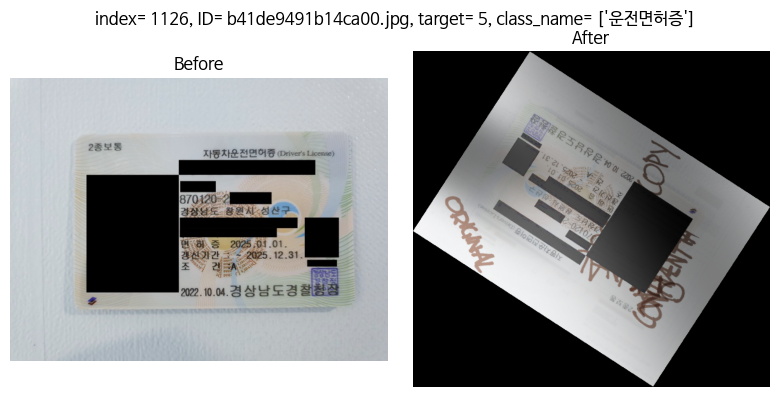

In [10]:
show_augraphy_augmented_image(train_df.copy(), 'train', augmentation_pipeline)